<a href="https://colab.research.google.com/github/DanieleScal99/MLPNS_DScalabrini/blob/main/DScalabrini_higgsbosonSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import os
import json
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


- Download the Higgs boson data from Kaggle (programmatically within the notebook)
see how I did it in the Titanic Trees notebook https://github.com/fedhere/DSPS/blob/master/lab9/titanictree.ipynb

find the correct API link here https://www.kaggle.com/c/higgs-boson/data

Data Dictionary (Dataset semantics) http://opendata.cern.ch/record/328


In [3]:
pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
ls 


drive/  sample_data/


In [5]:
cd drive/


/content/drive


In [6]:
ls

MyDrive/  Shareddrives/


In [7]:
cd MyDrive/

/content/drive/MyDrive


In [8]:
cd MLPNS_2023

/content/drive/MyDrive/MLPNS_2023


In [9]:
ls

HiggsBosonCompetition_AMSMetric_rev1.py  random_submission.zip  training.csv
higgs-boson.zip                          test.csv               training.zip
kaggleTitanic/                           test.zip


In [10]:
!unzip higgs-boson.zip

Archive:  higgs-boson.zip
replace HiggsBosonCompetition_AMSMetric_rev1.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: HiggsBosonCompetition_AMSMetric_rev1.py  
replace random_submission.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: random_submission.zip   
replace test.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.zip                
replace training.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: training.zip            


In [11]:
!unzip test.zip
!unzip training.zip


Archive:  test.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                
Archive:  training.zip
replace training.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: training.csv            



- Read in the trainind data. Split the provided training data into a training and a test set. 
The last 2 columns are what you want to predict: "weight" and "label".
Remove them from the input data and create a separate variable label and a separate variable weight, which will be your target variables for, respectively, classification and regression.



In [33]:
higgsdata=pd.read_csv('training.csv')
higgsdata.shape

(250000, 33)

In [13]:
higgsdata.head()

EventId  DER_mass_MMC  DER_mass_transverse_met_lep  DER_mass_vis  DER_pt_h  \
0   100000       138.470                       51.655        97.827    27.980   
1   100001       160.937                       68.768       103.235    48.146   
2   100002      -999.000                      162.172       125.953    35.635   
3   100003       143.905                       81.417        80.943     0.414   
4   100004       175.864                       16.915       134.805    16.405   

   DER_deltaeta_jet_jet  DER_mass_jet_jet  DER_prodeta_jet_jet  \
0                  0.91           124.711                2.666   
1               -999.00          -999.000             -999.000   
2               -999.00          -999.000             -999.000   
3               -999.00          -999.000             -999.000   
4               -999.00          -999.000             -999.000   

   DER_deltar_tau_lep  DER_pt_tot  ...  PRI_jet_num  PRI_jet_leading_pt  \
0               3.064      41.928  ...            2              67.435   
1               3.473       2.078  ...            1              46.226   
2               3.148       9.336  ...            1              44.251   
3               3.310       0.414  ...            0            -999.000   
4               3.891      16.405  ...            0            -999.000   

   PRI_jet_leading_eta  PRI_jet_leading_phi  PRI_jet_subleading_pt  \
0                2.150                0.444                 46.062   
1                0.725                1.158               -999.000   
2                2.053               -2.028               -999.000   
3             -999.000             -999.000               -999.000   
4             -999.000             -999.000               -999.000   

   PRI_jet_subleading_eta  PRI_jet_subleading_phi  PRI_jet_all_pt    Weight  \
0                    1.24                  -2.475         113.497  0.002653   
1                 -999.00                -999.000          46.226  2.233584   
2                 -999.00                -999.000          44.251  2.347389   
3                 -999.00                -999.000          -0.000  5.446378   
4                 -999.00                -999.000           0.000  6.245333   

   Label  
0      s  
1      b  
2      b  
3      b  
4      b  

[5 rows x 33 columns]

In [34]:
higgsdata.describe()
higgsdata=higgsdata.replace(-999, np.nan)
higgsdata=higgsdata.dropna()
(higgsdata==-999).sum()

EventId                        0
DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltaeta_jet_jet           0
DER_mass_jet_jet               0
DER_prodeta_jet_jet            0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
DER_lep_eta_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_num                    0
PRI_jet_leading_pt             0
PRI_jet_leading_eta            0
PRI_jet_leading_phi            0
PRI_jet_subleading_pt          0
PRI_jet_subleading_eta         0
PRI_jet_subleading_phi         0
PRI_jet_al

In [35]:
labels=higgsdata[['Label']]
labels

Label
0          s
5          b
6          s
11         b
23         s
...      ...
249976     s
249980     s
249985     s
249993     s
249994     b

[68114 rows x 1 columns]

In [36]:
weights=higgsdata[['Weight']]
weights

Weight
0       0.002653
5       0.083414
6       0.002653
11      0.307170
23      0.001503
...          ...
249976  0.001503
249980  0.018636
249985  0.018636
249993  0.001503
249994  0.064061

[68114 rows x 1 columns]

<ipython-input-37-0d716edefdf6>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  pl.figure()


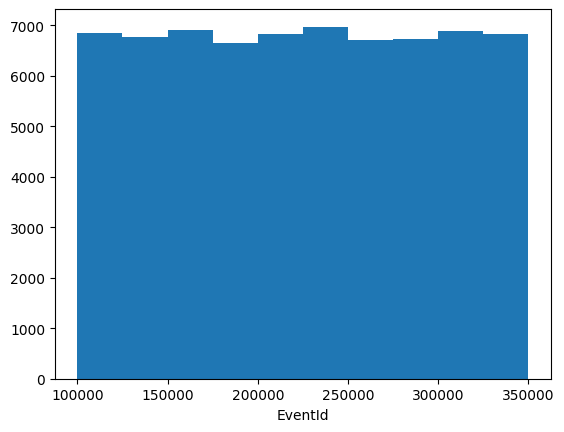

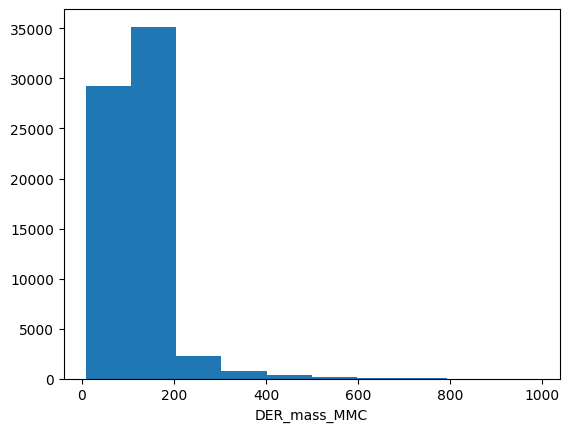

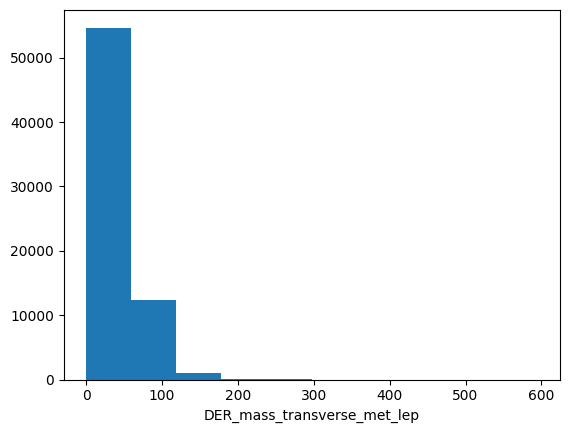

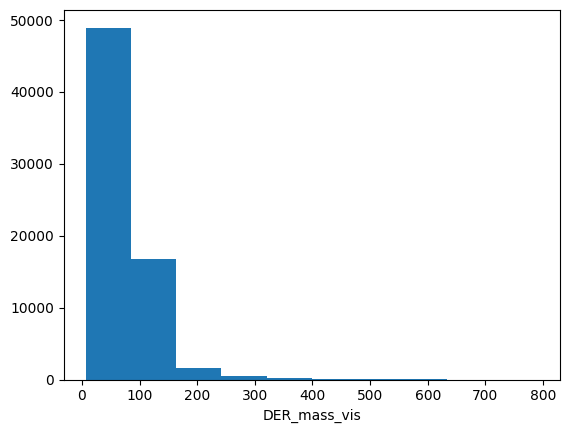

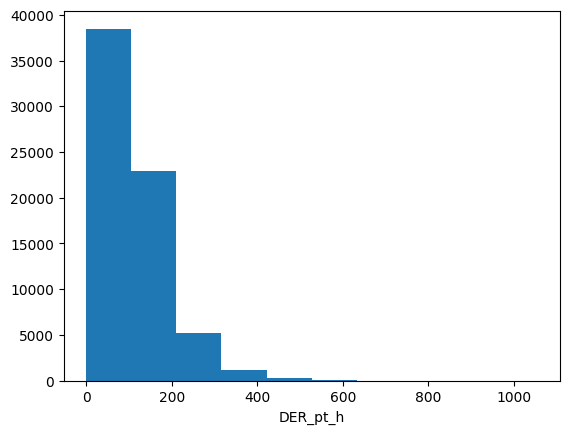

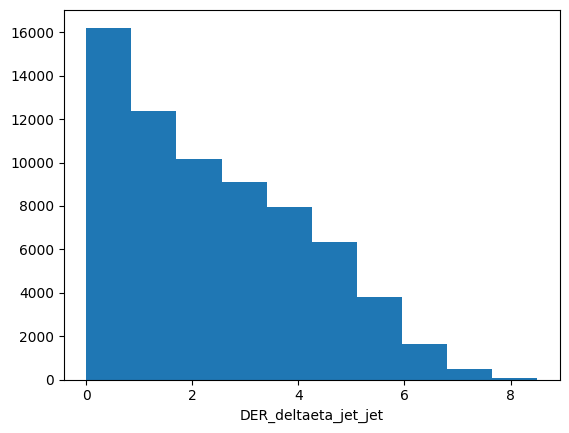

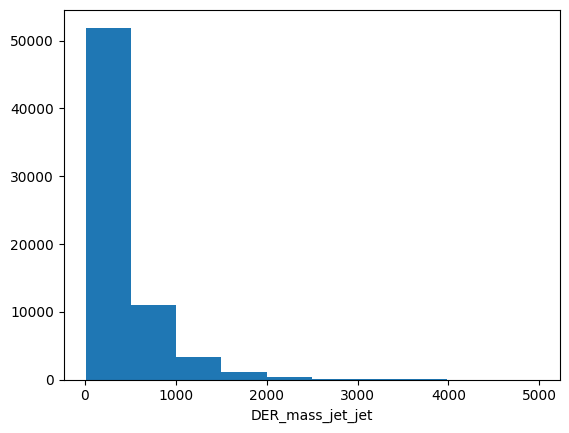

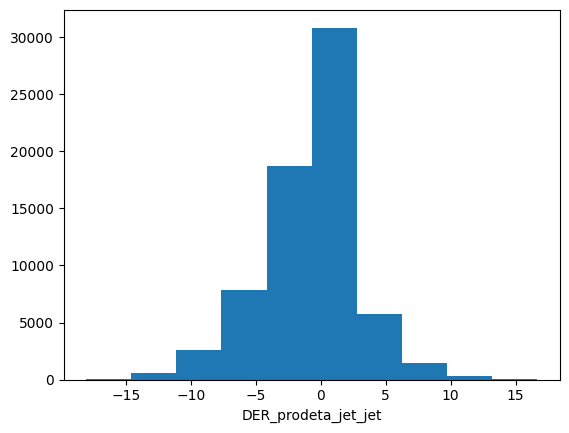

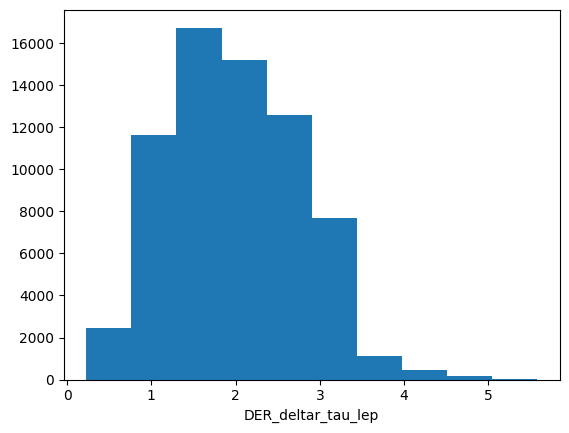

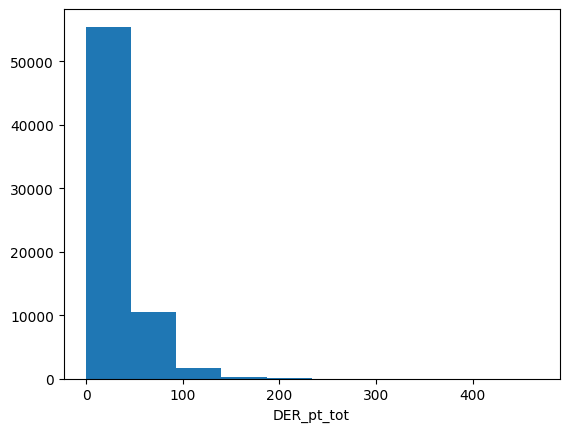

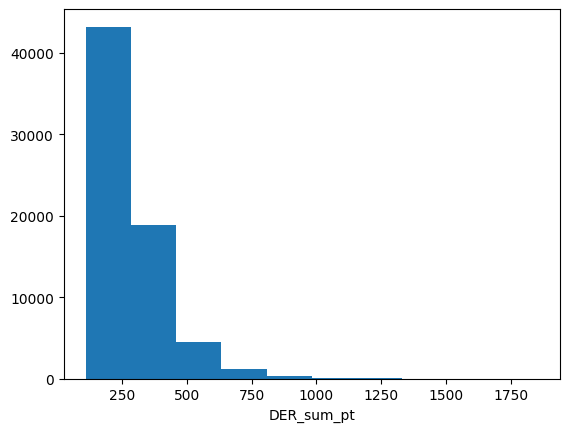

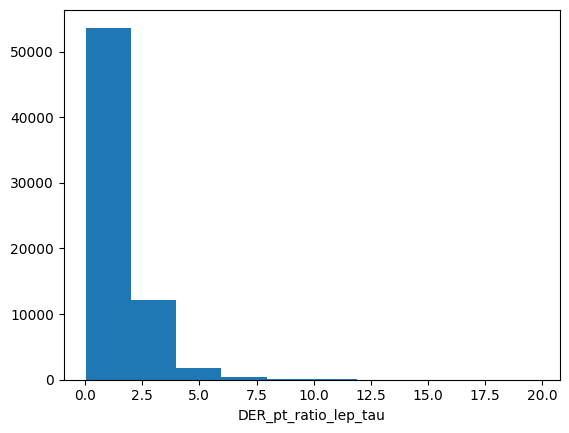

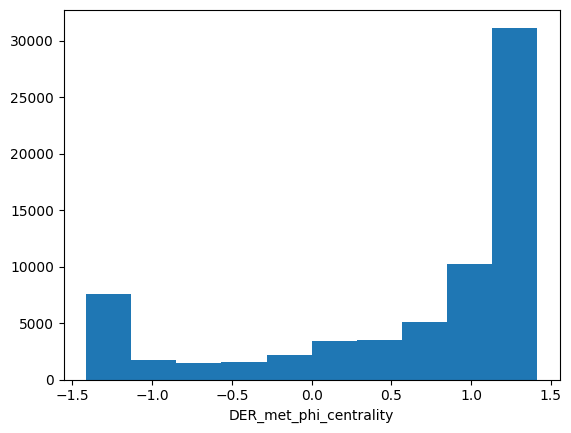

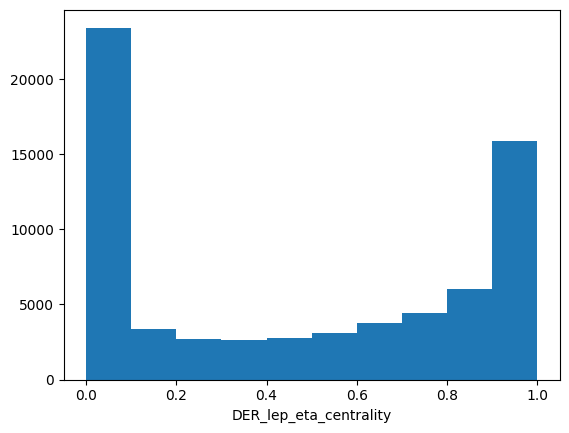

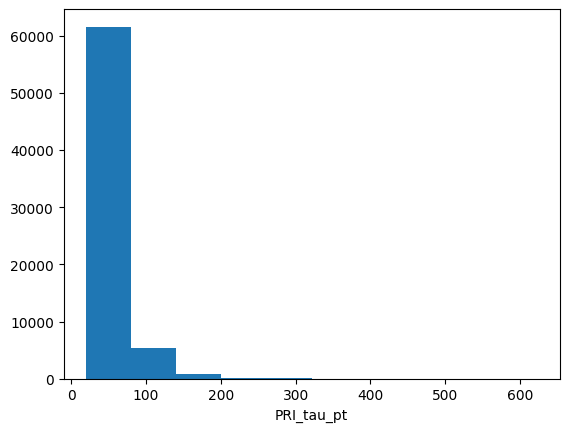

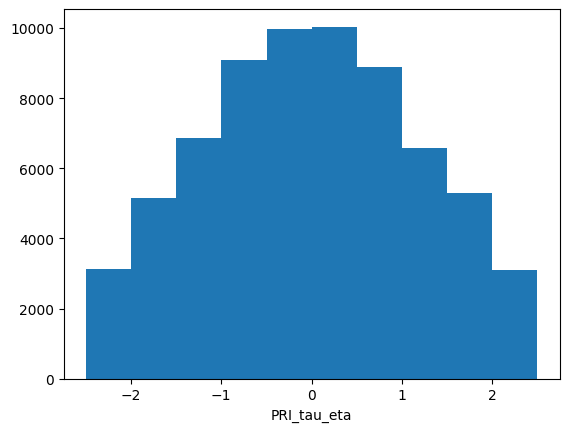

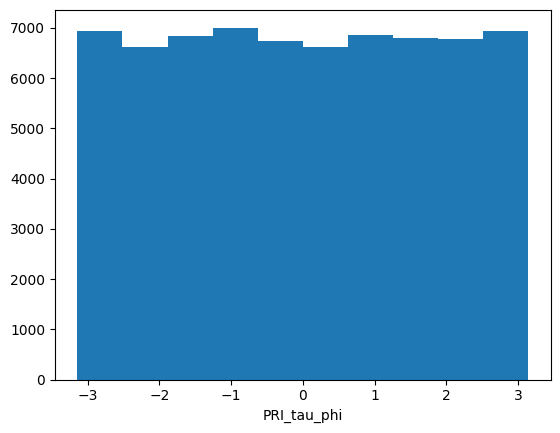

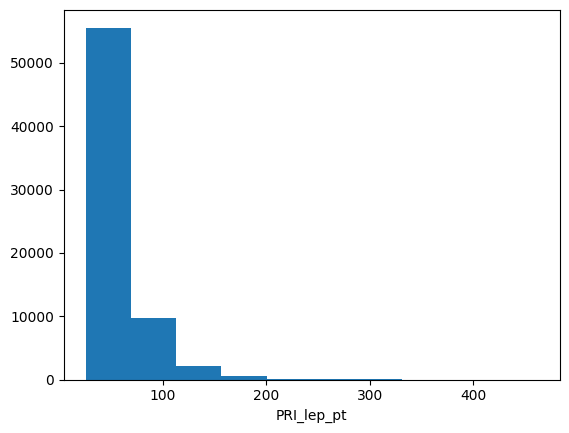

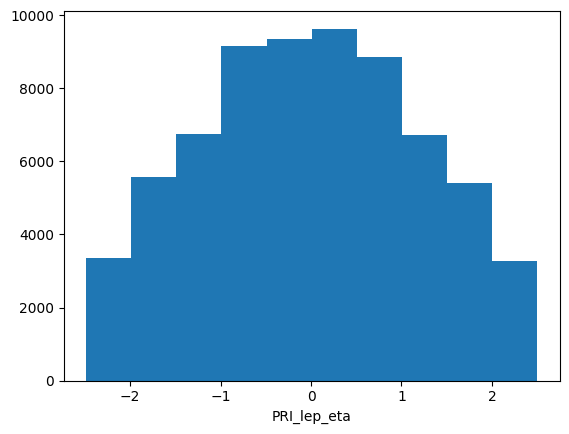

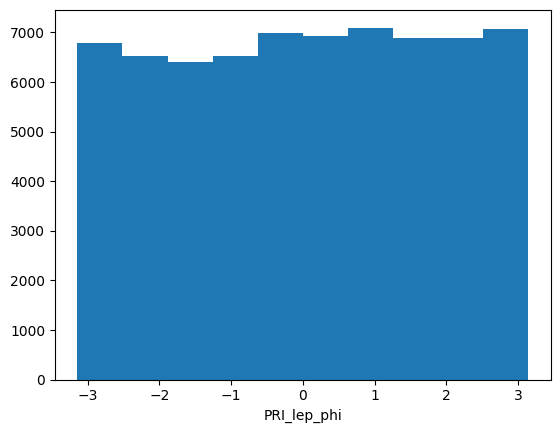

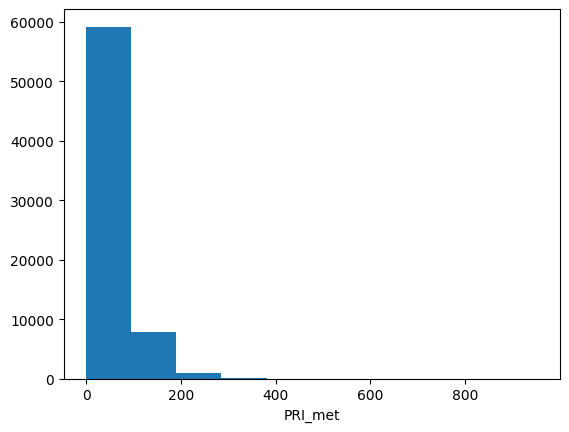

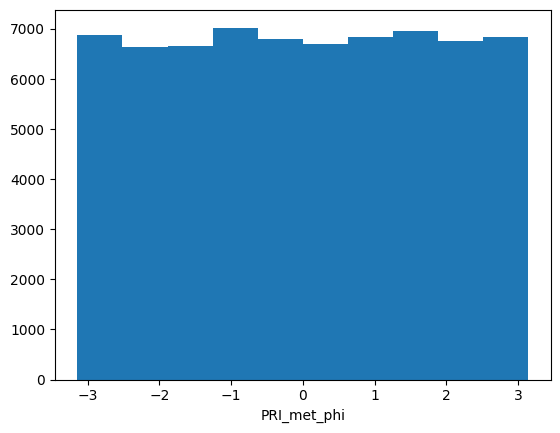

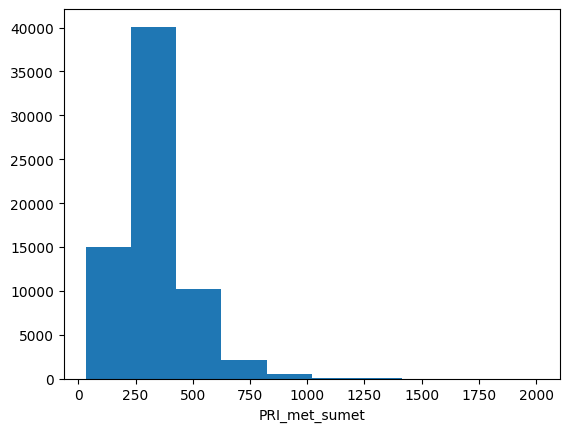

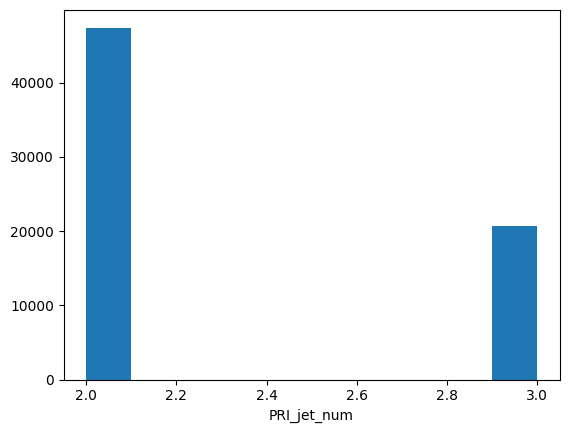

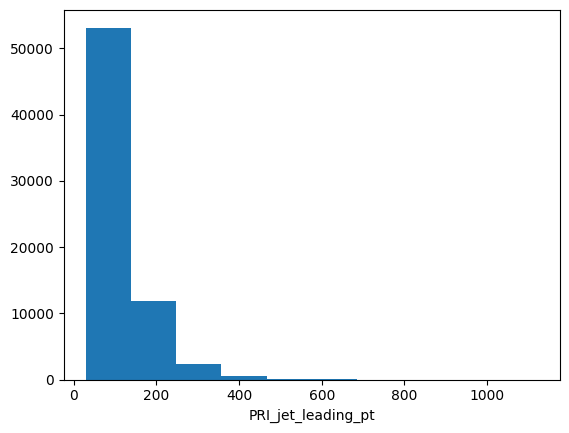

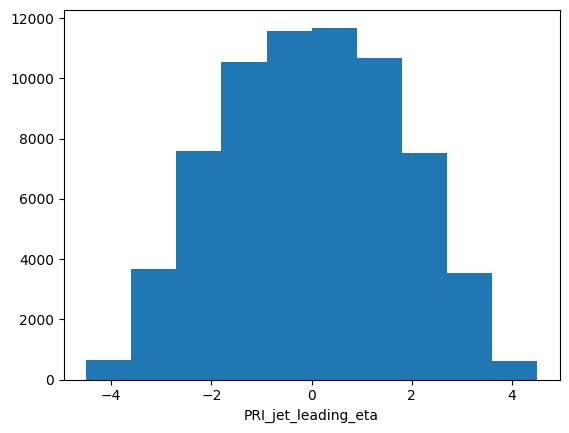

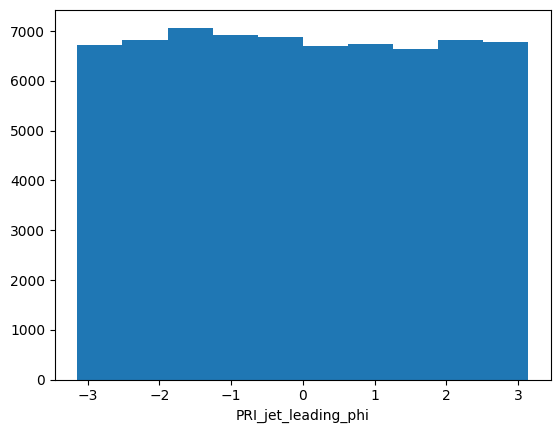

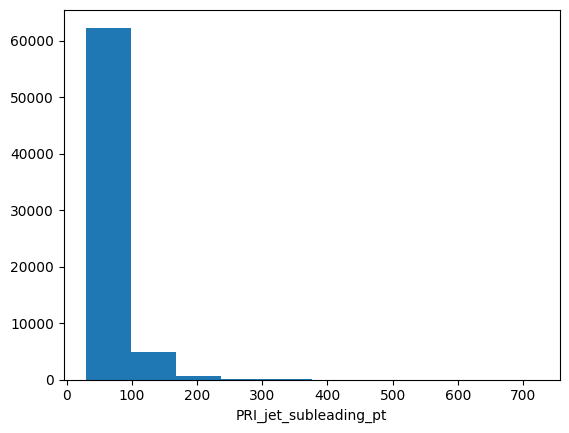

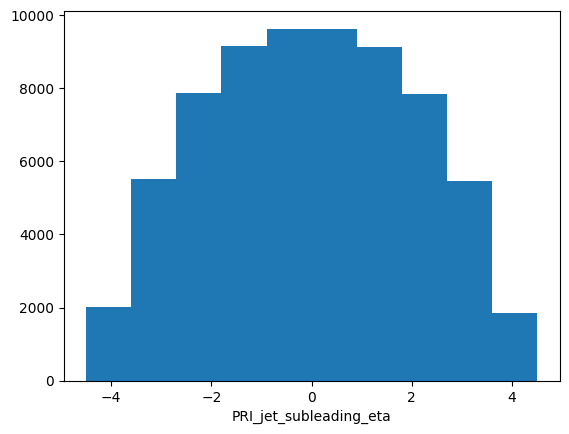

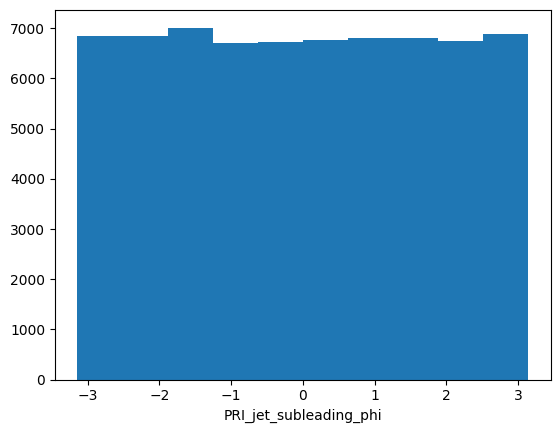

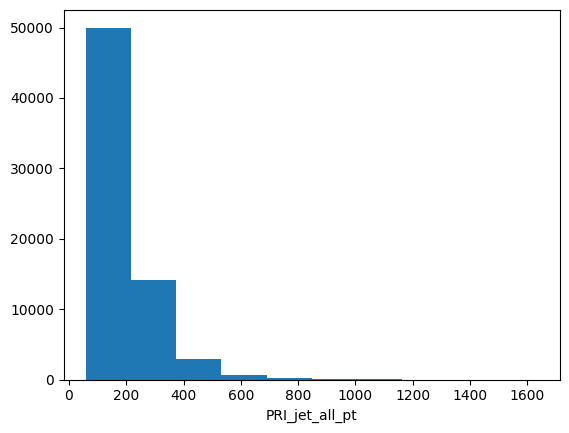

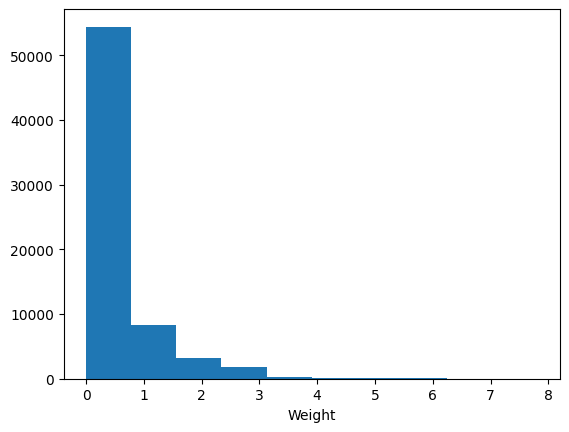

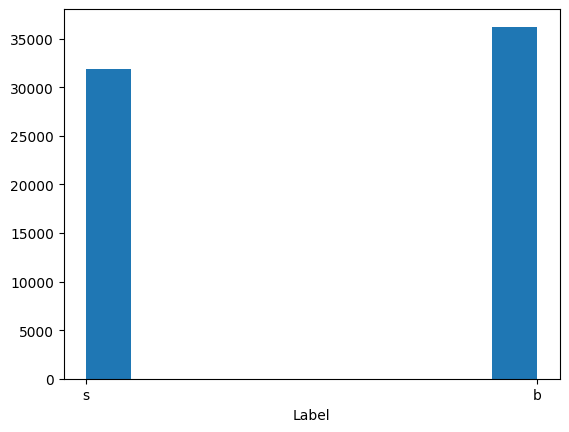

In [37]:
for c in higgsdata.columns:
  pl.figure()
  pl.hist(higgsdata[c])
  pl.xlabel(c)

In [18]:
(higgsdata==-999).sum()

EventId                             0
DER_mass_MMC                    38114
DER_mass_transverse_met_lep         0
DER_mass_vis                        0
DER_pt_h                            0
DER_deltaeta_jet_jet           177457
DER_mass_jet_jet               177457
DER_prodeta_jet_jet            177457
DER_deltar_tau_lep                  0
DER_pt_tot                          0
DER_sum_pt                          0
DER_pt_ratio_lep_tau                0
DER_met_phi_centrality              0
DER_lep_eta_centrality         177457
PRI_tau_pt                          0
PRI_tau_eta                         0
PRI_tau_phi                         0
PRI_lep_pt                          0
PRI_lep_eta                         0
PRI_lep_phi                         0
PRI_met                             0
PRI_met_phi                         0
PRI_met_sumet                       0
PRI_jet_num                         0
PRI_jet_leading_pt              99913
PRI_jet_leading_eta             99913
PRI_jet_lead

In [38]:
higgsdata=higgsdata.drop(["Weight","Label"],axis=1)

In [29]:
higgsdata.describe()

EventId  DER_mass_MMC  DER_mass_transverse_met_lep  DER_mass_vis  \
count   68114.000000  68114.000000                 68114.000000  68114.000000   
mean   225035.224154    122.816184                    35.270300     78.496815   
std     72243.940540     60.751559                    30.750262     40.728784   
min    100000.000000      9.878000                     0.000000      7.330000   
25%    162349.750000     93.320250                    11.320000     57.274250   
50%    225288.000000    113.230000                    26.964000     70.930000   
75%    287772.750000    133.455750                    52.202750     88.372000   
max    349994.000000    988.199000                   594.287000    789.538000   

           DER_pt_h  DER_deltaeta_jet_jet  DER_mass_jet_jet  \
count  68114.000000          68114.000000      68114.000000   
mean     111.430393              2.434232        378.176455   
std       76.318688              1.750700        400.784254   
min        0.120000              0.000000         13.602000   
25%       57.827000              0.897000        113.463000   
50%       94.714000              2.146500        232.370500   
75%      145.824750              3.741000        489.447750   
max     1053.807000              8.503000       4974.979000   

       DER_prodeta_jet_jet  DER_deltar_tau_lep    DER_pt_tot  ...  \
count         68114.000000        68114.000000  68114.000000  ...   
mean             -0.881020            1.996525     27.356644  ...   
std               3.592624            0.774636     28.266913  ...   
min             -18.066000            0.228000      0.004000  ...   
25%              -2.729000            1.397000      4.218000  ...   
50%              -0.284000            1.940000     22.542000  ...   
75%               0.921000            2.574000     39.067750  ...   
max              16.648000            5.579000    466.525000  ...   

        PRI_met_phi  PRI_met_sumet   PRI_jet_num  PRI_jet_leading_pt  \
count  68114.000000   68114.000000  68114.000000        68114.000000   
mean       0.006987     334.677667      2.303711          106.879969   
std        1.813892     139.867044      0.459863           68.165852   
min       -3.142000      34.323000      2.000000           30.196000   
25%       -1.550000     239.168250      2.000000           60.844500   
50%        0.005000     305.170000      2.000000           87.369000   
75%        1.573000     396.382500      3.000000          131.069000   
max        3.142000    2003.976000      3.000000         1120.573000   

       PRI_jet_leading_eta  PRI_jet_leading_phi  PRI_jet_subleading_pt  \
count         68114.000000         68114.000000           68114.000000   
mean             -0.005791            -0.011564              57.915426   
std               1.746442             1.809276              32.224318   
min              -4.497000            -3.142000              30.000000   
25%              -1.339000            -1.574000              37.392250   
50%               0.000000            -0.032000              48.105500   
75%               1.330000             1.558000              66.946500   
max               4.499000             3.141000             721.456000   

       PRI_jet_subleading_eta  PRI_jet_subleading_phi  PRI_jet_all_pt  
count            68114.000000            68114.000000    68114.000000  
mean                -0.012930               -0.004782      183.374631  
std                  2.044065                1.817247      108.312736  
min                 -4.500000               -3.142000       60.223000  
25%                 -1.628750               -1.579000      109.472000  
50%                 -0.014000               -0.008000      154.136500  
75%                  1.604000                1.573000      223.595250  
max                  4.500000                3.142000     1633.433000  

[8 rows x 31 columns]

In [21]:
# leave
from sklearn.model_selection import train_test_split 
train_test_split?

- Use a Random Forest and a Gradiend Boosted Tree Classifier model to predict the label of the particles. get the score of the model on the training and test set and comment on the result for each model.


In [124]:
traindata, testdata, train_label, test_label=train_test_split(higgsdata.values, labels, test_size=0.2, train_size=0.2)

In [23]:
#leave 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification

# Look at parameters used by our current forest
rf = RandomForestClassifier(random_state = 222)
print('Parameters currently in use:\n')
print(rf.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 222, 'verbose': 0, 'warm_start': False}


In [40]:
gbt = GradientBoostingClassifier(random_state=222)

In [59]:
rf_fit = rf.fit(traindata, train_label)
gbt_fit = gbt.fit(traindata, train_label)

<ipython-input-59-7324500ed116>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_fit = rf.fit(traindata, train_label)
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


calculate the  scores for the training and test sets and evaluate  overtraining etc

In [61]:
gbt.score(testdata,test_label)

0.8406371577479264

In [45]:
rf.score(testdata,test_label)

0.8412978051824122

- Produce a confusion matrix for each model and compare them


 



In [48]:

# I creaded this function (mostly copied from sklearn examples). 
# You can use it to create the confusion matrix
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title='',
                          cmap=pl.cm.bone):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """         
    if normalize:
          title = title + ' Normalized confusion matrix'
    else:
          title = title + ' Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # plot it
    fig, ax = plt.subplots(1, 1)
    fig.subplots_adjust()
    im = ax.imshow(cm, cmap=cmap)
    ax_divider = make_axes_locatable(ax)
    # add an axes to the right of the main axes.
    pl.xticks([0, 1], labels=["N", "P"])
    pl.ylim(-0.5,1.5)
    pl.yticks([0,1], labels=["N", "P"])    
    pl.title(title)
    cax = ax_divider.append_axes("right", size="10%", pad="2%")
    cb = colorbar(im, cax=cax)
    

In [126]:

test_label
rf_prediction = rf.predict(test_label)
#plot_confusion_matrix(test_label,))

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


ValueError: ignored


- Use a Random Forest and a Gradiend Boosted Tree Regressor model to predict the weight of the particles. Compare the model performance on training and test setsm


In [ ]:
traindata_weights, testdata_weights, train_weights, test_weights = ...

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfR = RandomForestRegressor(n_estimators=100, max_depth=3,
                                  random_state=0)
rfR.fit(...)
gbtR = ...
gbtR.fit(...)

 Calculate the L2 and L1 loss functions for the fitted regression models (see slides for the definition) and discuss the results

In [ ]:

print("L1 RF....."

- For the Random Forest classifier, find the 4 most important features based on the simple unoptimized model you created earlier on. Use the documentation to find out what they are. We have not talked abotu the physics of this problem at all but the Kaggle challenge description should provide enogh information for you to comment on this result is somewhat superficially.

You can use ```rf.feature_importance_``` on the trained model to extract the relative importance of each feature (a number from 0 to 1) and then choose the features that have the 4 highest numbers (the numpy function ```argsort()``` is helpful here!)

Explore the parameter space with the sklearn module ```sklearn.model_selection.RandomizedSearchCV``` *fitting only those 4 features*

Follow this example to set up the parameter search. Set the estimators to 10 and 100, (the number of trees) and the max depth to 3, and 10, and None (let it be unconstrained). Set bootstrap to both True and False. Set the number of features to consider at every split to both "autp" and "sqrt". Use ```pprint``` like I did earlier in this notebook to print the parameters set

**this takes some computational time! so do not start this at the last minute!!**

 



In [ ]:
pprint(random_grid)


 mine and your best features do not necessarily have to be the same because our models may be different (different parameters, different random seed etc)

In [ ]:
higgsdata.iloc[:, best_features_index]

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation, 
# search across 18 different combinations
random_search = RandomizedSearchCV(estimator = rf, param_distributions=random_grid,
                                   n_iter=1, cv=3, iid=False)


Note that this may take a long time! It took 1 hour for me to run this. Dont start at the last minute!!

In [ ]:
random_search.fit(...
                  

In [ ]:
print("Tuned RF  Parameters: {}".format(...))
print("Best score is {}".format(...))


In [ ]:
df = pd.DataFrame(random_search.cv_results_)


In [ ]:
df

# Plot a simple 3-point ROC curve for the model with the best parameters found in the previous step. Describe it. 

In [ ]:
rf.fit(traindata, train_label.values.flatten()=="s", max_depth.....)

In [ ]:
# The random forest model by itself
from sklearn.metrics import roc_curve
y_pred_grd_rfcat = rf.predict_proba(testdata)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(test_label.values.flatten()=="s", rf.predict(y_pred_grd_rfcat))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
